# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#Three observable trends based on the data
#    1. The temperature steadily increases as we increase in latitude, but begins to drop after 20 degrees latitude, which is referred to as the 20th parallel north, which is known for having slightly longer days during the summer solstice. Perhaps the increase in temperature may be due to data being retrieved close to summer soltice. 
#    2. There is no obvious correlation at first glance at humidity and latitude as well as at cloudiness and latitude, however, after calculating the correlation coefficiant,there appears to be a very slight negative correlation .
#    3. There does not appear to be a clear correlation between wind speeds and latitude, however, calculations indicate a slight negative correlation.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

record = 1
set_num = 1

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set {set_num}| {city_record}")
        
        record= record + 1
        if record > 50:
            set_num = set_num + 1
            record = 1
        
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue
    
print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1| Pontianak
Processing Record 2 of Set 1| Usagara
Processing Record 3 of Set 1| Thunder Bay
City not found. Skipping...
City not found. Skipping...
Processing Record 4 of Set 1| Tuatapere
Processing Record 5 of Set 1| Ilulissat
Processing Record 6 of Set 1| Pevek
Processing Record 7 of Set 1| Ushuaia
Processing Record 8 of Set 1| Qaanaaq
City not found. Skipping...
Processing Record 9 of Set 1| Kumul
Processing Record 10 of Set 1| Kungurtug
Processing Record 11 of Set 1| Saint-Philippe
Processing Record 12 of Set 1| Mar del Plata
Processing Record 13 of Set 1| Port Elizabeth
Processing Record 14 of Set 1| Itarema
Processing Record 15 of Set 1| Hithadhoo
Processing Record 16 of Set 1| Rikitea
Processing Record 17 of Set 1| Esperance
City not found. Skipping...
Processing Record 18 of Set 1| Kaitangata
Processing Record 19 of Set 1| Mataura
Processing Record 20 of Set 1| Kapaa
Processing Record 21 of Set 1

Processing Record 38 of Set 4| Samarai
Processing Record 39 of Set 4| Oussouye
Processing Record 40 of Set 4| Thompson
Processing Record 41 of Set 4| Provideniya
Processing Record 42 of Set 4| Los Angeles
Processing Record 43 of Set 4| Aswān
Processing Record 44 of Set 4| Caravelas
Processing Record 45 of Set 4| Ponta do Sol
Processing Record 46 of Set 4| Qui Nhon
City not found. Skipping...
Processing Record 47 of Set 4| Arrondissement de Mende
Processing Record 48 of Set 4| Vangaindrano
Processing Record 49 of Set 4| Santa Maria
Processing Record 50 of Set 4| Buraidah
Processing Record 1 of Set 5| Ponta Delgada
Processing Record 2 of Set 5| Kavaratti
Processing Record 3 of Set 5| Isangel
Processing Record 4 of Set 5| Jamestown
Processing Record 5 of Set 5| Atikokan
Processing Record 6 of Set 5| Tanhaçu
Processing Record 7 of Set 5| Bilma
Processing Record 8 of Set 5| Cap-aux-Meules
Processing Record 9 of Set 5| Fortuna
Processing Record 10 of Set 5| Novy Urengoy
Processing Record 11 

Processing Record 29 of Set 8| Yantongshan
Processing Record 30 of Set 8| Athabasca
Processing Record 31 of Set 8| Bayir
Processing Record 32 of Set 8| Jingdezhen
Processing Record 33 of Set 8| Pontes e Lacerda
City not found. Skipping...
Processing Record 34 of Set 8| Pacific Grove
Processing Record 35 of Set 8| Strezhevoy
Processing Record 36 of Set 8| Madimba
Processing Record 37 of Set 8| West Plains
Processing Record 38 of Set 8| Port-Gentil
Processing Record 39 of Set 8| Waddān
Processing Record 40 of Set 8| Tagusao
Processing Record 41 of Set 8| Acaraú
Processing Record 42 of Set 8| Hasaki
Processing Record 43 of Set 8| Abong Mbang
Processing Record 44 of Set 8| Carupano
Processing Record 45 of Set 8| Cayenne
Processing Record 46 of Set 8| Honiara
Processing Record 47 of Set 8| Dossor
Processing Record 48 of Set 8| Bobo-Dioulasso
Processing Record 49 of Set 8| Amahai
Processing Record 50 of Set 8| Samaná
Processing Record 1 of Set 9| Letlhakane
Processing Record 2 of Set 9| Dubb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
weatherpy_dict = {"City": city_name,"Lat": lat, "Lng": lng, "Max Temp": max_temp,"Humidity": humidity,"Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country":country,"Date":date}

weatherpy_df = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weatherpy_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [14]:
weatherpy_df.to_csv('output_data/weatherpy_df.csv')

weatherpy_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pontianak,-0.03,109.33,89.15,57,82,4.00,ID,1592624336
1,Usagara,-2.68,33.00,66.20,93,75,7.20,TZ,1592624337
2,Thunder Bay,48.40,-89.32,66.00,63,75,9.17,CA,1592624137
3,Tuatapere,-46.13,167.68,48.58,82,45,3.15,NZ,1592624311
4,Ilulissat,69.22,-51.10,41.00,75,0,8.05,GL,1592623994


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [100]:
print('There are no cities with humidity that exceeds 100%.')

There are no cities with humidity that exceeds 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

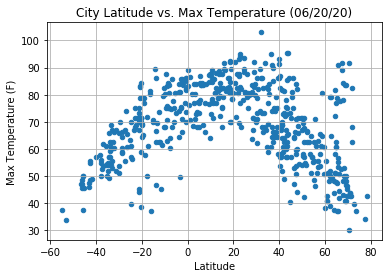

In [24]:
# Build a scatter plot for each data type
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Max Temp"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (06/20/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_Temp_plot.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

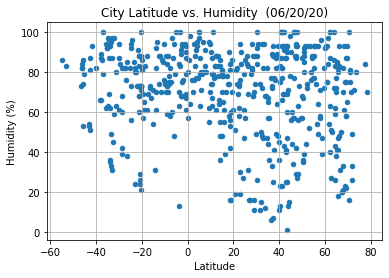

In [26]:
# Build a scatter plot for each data type
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Humidity"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity  (06/20/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_Humidity_plot.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

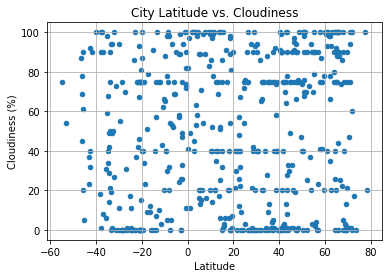

In [27]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Cloudiness"], marker="o", s=20)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_Cloudiness_plot.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

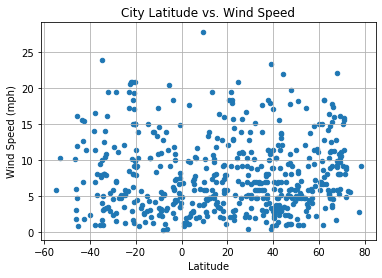

In [29]:
plt.scatter(weatherpy_df["Lat"], weatherpy_df["Wind Speed"], marker="o", s=20)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("output_data/Latitude_WindSpeed_plot.png")

plt.show()

## Linear Regression

In [101]:
north = weatherpy_df.loc[weatherpy_df["Lat"] >= 0]
south = weatherpy_df.loc[weatherpy_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.07171743694269034


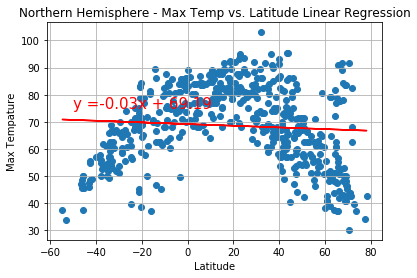

In [103]:
correlation_coeff = st.pearsonr(north["Lat"], north["Max Temp"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Tempature")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.07171743694269034


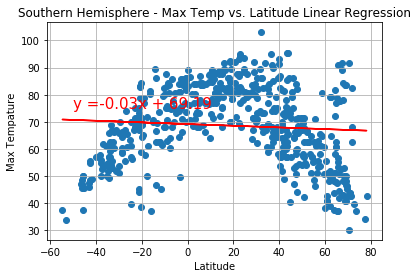

In [105]:
correlation_coeff = st.pearsonr(south["Lat"], south["Max Temp"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Tempature")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,75),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
    
    #The linear regression modeling appears to indicate that there is a slight negative correlation between maximum tempature levels and latitude. This means that as the latitude increases, the maximum temperatures tend to decrease.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.15679759868479864


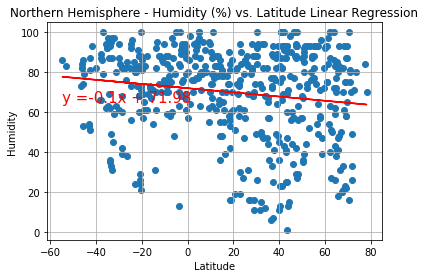

In [106]:
correlation_coeff = st.pearsonr(north["Lat"], north["Humidity"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-55,65),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.15679759868479864


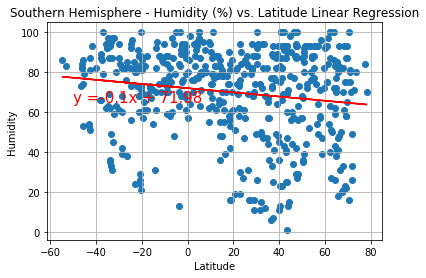

In [107]:
correlation_coeff = st.pearsonr(south["Lat"], south["Humidity"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

In [108]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
    
    #1. The linear regression model indictes that there is a slightly negative trend between humidity and latitude, indicating that as the latitude increases, the less humid it is.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.15679759868479864


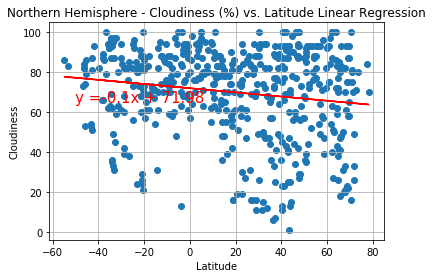

In [109]:
correlation_coeff = st.pearsonr(north["Lat"], north["Cloudiness"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.15679759868479864


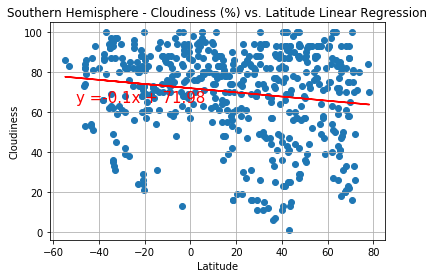

In [110]:
correlation_coeff = st.pearsonr(south["Lat"], south["Cloudiness"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
    
    #2. There appears to be a slight decrease in cloudiness as you increase in latitude,

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15679759868479864


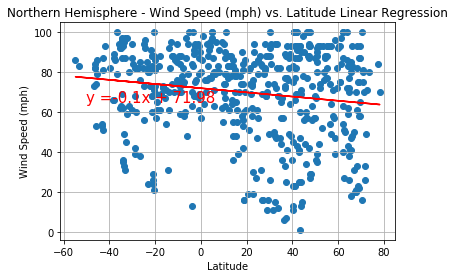

In [111]:
correlation_coeff = st.pearsonr(north["Lat"], north["Wind Speed"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.15679759868479864


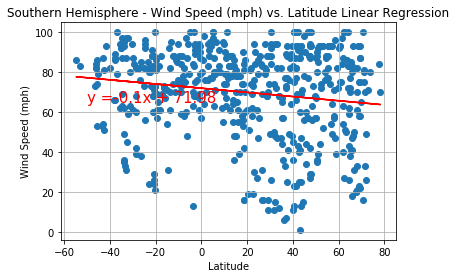

In [112]:
correlation_coeff = st.pearsonr(south["Lat"], south["Wind Speed"])
x_val = weatherpy_df['Lat']
y_val = weatherpy_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_val = x_val * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_val,y_val)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_val,regress_val,"r-")
plt.annotate(line_eq,(-50,65),fontsize=15,color="red")

print(f"The r-squared is : {st.pearsonr(x_val, y_val)[0]}")

In [ ]:
#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
    
    #3. There appears to be a slight negative trend between wind speed and latitude. This indicates that as you increase in latitude, humidity also decreases.